## 分析三类事件各自的ROOT文件

In [1]:
int runid = 217;  //大：86；中：110；小：157

### Chico事件

In [2]:
TFile *fChico = new TFile(Form("CHICO_ROOT/Chico%04d.root",runid));
TTree *treeChico = (TTree*)fChico->Get("tree");
TCanvas *c1 = new TCanvas;

In [3]:
Double_t tsChico,tsbuf;
treeChico->SetBranchAddress("ts",&tsChico);

In [4]:
TH1I* dtChico = new TH1I("dtChico","",400,-100000,200000);

In [5]:
int nentriesChico = treeChico->GetEntriesFast();
for (int jentry=0;jentry<nentriesChico;jentry++)
{
    treeChico->GetEntry(jentry);
    //tsChico /= 10;
    if (jentry!=0)
        dtChico->Fill(tsChico-tsbuf);
    tsbuf = tsChico;
}

In [6]:
cout<<nentriesChico;

3830720

### 结论：Chico事件已按timestamp排序，且相邻Chico事件最小间隔约为40微秒

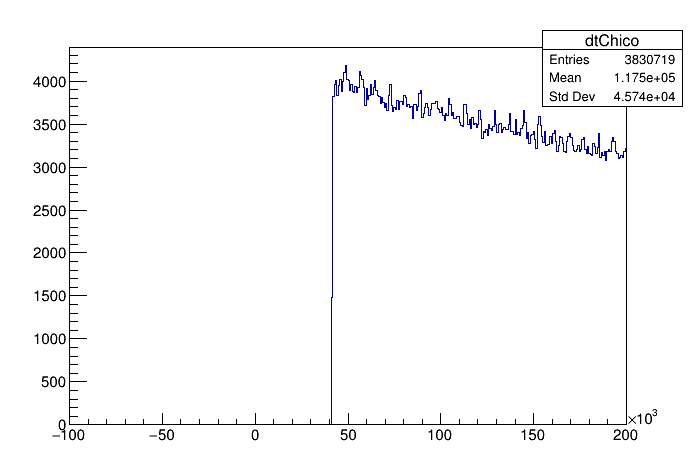

In [7]:
dtChico->Draw();
c1->Draw();

### Gamma事件

In [8]:
TFile *fGT = new TFile(Form("/data/d3/zhangjizhi/MNT/GAMMAGT_ROOT/GT%04d.root",runid));
TTree *treeGT = (TTree*)fGT->Get("tree");

In [9]:
Double_t tsGT;
treeGT->SetBranchAddress("ts",&tsGT);

In [10]:
TH1D* dtChicoGT = new TH1D("dtChicoGT","",1600,-1400,1800);
TH1I* numCoin = new TH1I("numCoin","",50,0,50);

#### 如果gamma事件位于某一Chico事件的正负20微秒范围内，就将其与该Chico事件的时间差填入histogram；且该Chico事件的符合数+1

In [11]:
int nentriesGT = treeGT->GetEntriesFast();
int ientry=0,jentry=0;
int numcoin=0;
while (ientry<nentriesChico && jentry<nentriesGT)
{
    treeChico->GetEntry(ientry);
    //tsChico /= 10;
    treeGT->GetEntry(jentry);
    //tsGT *= 10;

    if (abs(tsGT-tsChico)<20000){
        dtChicoGT->Fill(tsGT-tsChico);
        jentry++;
        numcoin++;
    }
    else if (tsGT < tsChico)
        jentry++;
    else{
        ientry++;
        numCoin->Fill(numcoin);
        numcoin = 0;
    }
}

### 结论：前一 Chico 事件 +1.5 ns 至后一 Chico 事件 -1.2 ns 之间，没有 gamma 事件

#### 峰值位于ts=-207，周期约0.8微秒

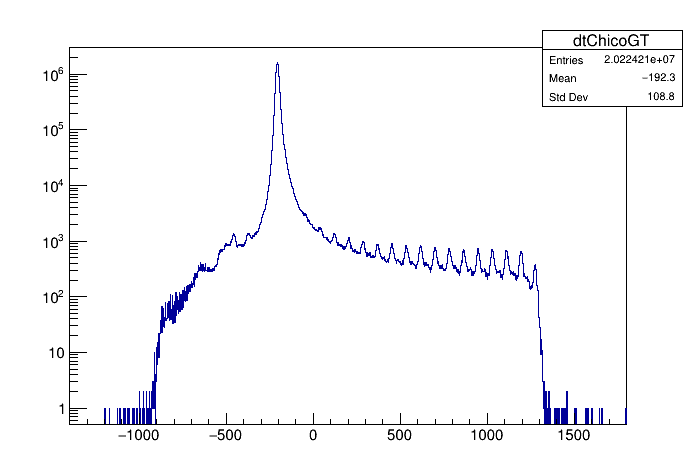

In [12]:
//%jsroot on
dtChicoGT->Draw();
c1->SetLogy();
c1->Draw();

### 与某一Chico事件符合的GammaGT事件数，以确定符合事件的数组长度（TK事件数总是少于GT事件）

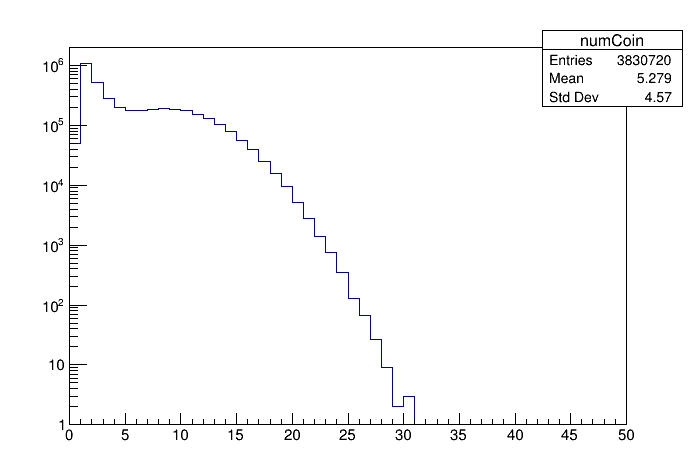

In [13]:
numCoin->Draw();
c1->SetLogy();
c1->Draw();

#### 可见符合事件数绝大多数不超过50；最终数组长度定为10000

### 完全正常文件（logbook中无特殊记录，用于搭建矩阵）

100 103 104 121 122 124 128 131 133 135 136 137 138 139 143 152 153 154 155 156 160 161 162 163 164 166 167 173 175 177 182 184 185 186 193 195 197 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214

### 正常文件（timestamp信息正常，可以转换为数据文件）

82 83 84 85 86 87 88 89 91 92 93 94 95 96 98 99 100 101 102 103 104 105 106 107 108 109 110 111 121 122 123 124 128 131 132 133 134 135 136 137 138 139 140 141 143 145 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 172 173 174 175 176 177 178 179 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217

### 异常文件（不做处理）

2 （GT\*10，看不到脉冲周期，中心偏移-207，分布不连续）

27 （GT\*10，看不到脉冲周期，中心偏移-207，分布不连续）

90 （GT\*10，分布不连续）

97 （GT\*10，看不到脉冲周期，分布不连续）

120 （空文件）